In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [5]:
data = pd.read_csv("../../data/serie_a_b_matches.csv")
data = data[data.columns.drop(list(data.filter(regex='Unnamed: ')))]
data['date'] = pd.to_datetime(data['date'])
data.sort_values(by='date', inplace=True)
data.head()

/var/folders/bl/xbg_536n2_n123s38z4hxbx00000gn/T/ipykernel_67259/2859592654.py:1: DtypeWarning: Columns (3,11,118,145) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../../data/serie_a_b_matches.csv")
/var/folders/bl/xbg_536n2_n123s38z4hxbx00000gn/T/ipykernel_67259/2859592654.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['date'] = pd.to_datetime(data['date'])


,div,date,time,home_team,away_team,FTHG,FTAG,FTR,HTHG,HTAG,...,LBAHH,LBAHA,LBAH,B365AH,SOH,SOD,SOA,SYH,SYD,SYA
21221,I1,1993-03-10,NaN,Atalanta,Sampdoria,1.0,4.0,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21222,I1,1993-03-10,NaN,Genoa,Reggiana,0.0,0.0,D,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21223,I1,1993-03-10,NaN,Juventus,Torino,3.0,2.0,H,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21224,I1,1993-03-10,NaN,Milan,Lazio,0.0,0.0,D,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21225,I1,1993-03-10,NaN,Napoli,Inter,0.0,0.0,D,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
cut_off = pd.to_datetime('2020-08-01')
data = data[data['date']>=cut_off]
data.reset_index(inplace=True, drop=True)

In [18]:
conditions = [data['FTHG']>data['FTAG'], data['FTHG']<data['FTAG'], data['FTHG']==data['FTAG']]
choices = [1, 0, 0.5]

data['result'] = np.select(conditions, choices)

In [30]:
data['prediction'] = data[['B365A', 'B365D', 'B365H']].idxmin(axis=1)
data['prediction'] = data['prediction'].replace({'B365H': 1, 'B365D': 0.5, 'B365A': 0})
data['correct'] = np.where((data['result'] == data['prediction']), 1, 0)

In [31]:
data['correct'].mean()

0.4936373276776246

In [32]:
data.head()

,div,date,time,home_team,away_team,FTHG,FTAG,FTR,HTHG,HTAG,...,SOH,SOD,SOA,SYH,SYD,SYA,result,prediction,correct,B365T
0,I1,2020-08-02,17:00,Torino,Sampdoria,1.0,3.0,A,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0,8.95
1,I1,2020-08-02,14:00,Fiorentina,Atalanta,1.0,2.0,A,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1,9.83
2,I2,2020-08-02,14:00,Pordenone,Livorno,2.0,2.0,D,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.5,1.0,0,10.25
3,I1,2020-08-02,19:45,Verona,Juventus,2.0,1.0,H,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0,13.00
4,I2,2020-08-02,17:00,Perugia,Spezia,0.0,3.0,A,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0,9.00


In [35]:
data['B365T'] = (1 / data['B365H']) + (1 / data['B365A']) + (1/ data['B365D']) 

In [36]:
data['B365T'] = data['B365T']*100

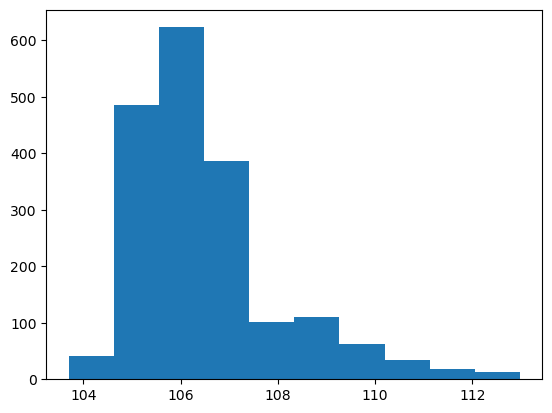

In [37]:
plt.hist(data['B365T']);

In [27]:
data['B365A']

0       3.50
1       1.83
2       5.25
3       1.50
4       3.90
        ... 
1881    2.90
1882    2.15
1883    6.00
1884    2.15
1885    3.80
Name: B365A, Length: 1886, dtype: float64